さんこう
https://ai-inter1.com/beautifulsoup_1/

In [ ]:
import urllib.request
from urllib.parse import urlparse
import csv

keyword = "ファッション"
url = 'https://google.com/search?q='+ keyword +'&filter=0&num=100'

# Perform the request
p = urlparse(url)
query = urllib.parse.quote_plus(p.query, safe='=&')
url = '{}://{}{}{}{}{}{}{}{}'.format(
    p.scheme, p.netloc, p.path,
    ';' if p.params else '', p.params,
    '?' if p.query else '', query,
    '#' if p.fragment else '', p.fragment)
request = urllib.request.Request(url)

# Set a normal User Agent header, otherwise Google will block the request.
request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
raw_response = urllib.request.urlopen(request).read()

# Read the repsonse as a utf-8 string
html = raw_response.decode("utf-8")

from bs4 import BeautifulSoup

# The code to get the html contents here.

soup = BeautifulSoup(html, 'html.parser')
divs = soup.select("#search div.g")
# divs2 = soup.select("#search div.g > h2 > a")

In [ ]:
soup

In [ ]:
for div in divs:
    print(div)
    print("")

In [ ]:
divs2 = soup.select(".g")
for div in divs2:
    print(div)
    print("")
    results = div.select("a")
    print(results)
    print(results[0].get('href'))
    print("")
    print("")

In [ ]:
results = div.select('a')
for result in results:
    print(result)
    print(result.get_text())
#     print(result.select('href'))
# for div in divs:
# #     results = div.select("span")
# #     print(results)
# #     print(div.get('href'))
#     results = div.select('a')
    
# #     print(result.attrs['href']) 
# #     print(results.find_all(href))
# #     print(results.select('href'))
# #     print(results)
    
#     print("")


In [ ]:
filename = keyword + '.csv'

with open(filename, 'w', newline='') as outcsv:
    csvwriter = csv.writer(outcsv)
    csvwriter.writerow(['keyword', 'site_name','snnipet',  'URL', 'ranking'])

    # Find all the search result divs

    for i, div in enumerate(divs):
        # Search for a h3 tag
        results = div.select("h3")
#         print(results)
        if (len(results) >= 1):
            # Print the title
            site_name = results[0].get_text()

        # Search for a span tag
        results = div.select("span")
        if (len(results) >= 1):
            # Print the snnipet
            snnipet = results[-1].get_text()

        results = div.select("a")
        if (len(results) >= 1):
            url_text = results[0].get('href')
        
        csvwriter.writerow([keyword, site_name, snnipet, '=HYPERLINK("' + url_text + '")', str(i)])
    outcsv.close()


# Print number of search result
print("count:", len(divs))

こっから違う話

In [11]:
import numpy as np

X = np.random.rand(36).reshape(9,4)
mask_std = np.zeros(X.shape)
X

array([[0.02563957, 0.26148839, 0.88517063, 0.30221923],
       [0.65465275, 0.15041464, 0.3076652 , 0.22434777],
       [0.75426818, 0.17865753, 0.05722034, 0.90072586],
       [0.69360749, 0.21415531, 0.95140567, 0.31142456],
       [0.05006059, 0.46811861, 0.23861253, 0.14761086],
       [0.71492739, 0.87082692, 0.60351851, 0.11769382],
       [0.68545572, 0.58573744, 0.60126744, 0.96855271],
       [0.00099986, 0.27962195, 0.18206966, 0.99145721],
       [0.96748163, 0.33388019, 0.43449703, 0.68776786]])

In [ ]:
print(np.argmax(X, axis=1))
mask = np.argmax(X, axis=1)
k_max = np.max(X, axis=0)

In [ ]:
# For mask and normalization(min:0, max->1)
for i, max_k in enumerate(mask):
    mask_std[i, max_k] = 1 / k_max[max_k]
X_mask_std = X * mask_std    

In [ ]:
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']
alpha = 0.1
# for k in DEFAULT_PLOTLY_COLORS:
#     print(")
DPC_with_Alpha = [k[:-1]+', '+str(alpha)+k[-1:] for k in DEFAULT_PLOTLY_COLORS]
DPC_with_Alpha

In [6]:
from sklearn.decomposition import NMF
recon = []
recon_check = []
Ws= []
for n_comp in range(2,11):
    model_t3 = NMF(
            n_components=n_comp,
            init='random',
            random_state=2,
            max_iter=300,
            solver='cd')
#     Ws.append(model_t3.fit_transform(X))
    model_t3.fit(X)
#     W = model_t3.fit_transform(X)
#     recon.append(model_t3.reconstruction_err_)
    H = model_t3.components_
#     print(W.shape)
    print(H)

    W@H
    recon_check.append(np.sum(np.square(X - W@model_t3.n_components_)))
    

#     # For mask and normalization(min:0, max->1)
#     mask_std = np.zeros(W.shape)
#     mask = np.argmax(W, axis=1)
#     for i, max_k in enumerate(mask):
#         mask_std[i, max_k] = 1 / np.max(W)
#     W_mask_std = W * mask_std
# min_k = np.arxmin(np.array(recon))
min_k = np.argmin(np.array(recon))

[[0.         0.90194139 1.16013859 0.92913361]
 [0.93539114 0.69591842 0.228855   0.35707488]]


NameError: name 'W' is not defined

In [ ]:
min_k
X.shape
H


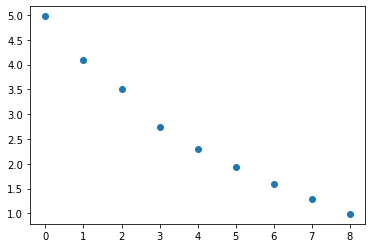

In [63]:
range(2,11)[5]
recon = [4.972680932536464, 4.100527742676905, 3.502410655658506, 2.746010898766964, 2.2896091155074947, 1.9391879820336035, 1.58341841449636, 1.2923719015502566, 0.9906785108517413]
recon = np.array(recon)
# recon = recon ** 2
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(np.arange(len(recon)), recon)

In [64]:
# Diff_recons = np.diff(np.array(recon))    
# Diff_recons = [a - b for a, b in zip(recon[:-1], recon[1:])] Why????
Diff_recons = []
for i, j in zip(recon[:-1], recon[1:]):
    Diff_recons.append(i - j)    
Diff_recons = np.array(Diff_recons)
print(Diff_recons)
min_k = np.argmin(np.array(recon))
genshou = []
genshou_ = []
for i, (prev, ahead) in enumerate(zip(Diff_recons[:-1], Diff_recons[1:])):
    print(np.array(recon)[i], np.array(recon)[i+1])
    print(prev, ahead)
    print(ahead/prev)
    genshou.append(ahead/prev)
    genshou_.append(ahead - prev)
    if ahead/prev > 0.5: 
        min_k = i
#         break
min_k

[0.87215319 0.59811709 0.75639976 0.45640178 0.35042113 0.35576957
 0.29104651 0.30169339]
4.972680932536464 4.100527742676905
0.8721531898595583 0.5981170870183994
0.6857936128339029
4.100527742676905 3.502410655658506
0.5981170870183994 0.7563997568915419
1.2646349240115815
3.502410655658506 2.746010898766964
0.7563997568915419 0.45640178325946934
0.6033870041617577
2.746010898766964 2.2896091155074947
0.45640178325946934 0.35042113347389114
0.7677908946176771
2.2896091155074947 1.9391879820336035
0.35042113347389114 0.35576956753724365
1.0152628753018715
1.9391879820336035 1.58341841449636
0.35576956753724365 0.2910465129461033
0.8180759106542612
1.58341841449636 1.2923719015502566
0.2910465129461033 0.3016933906985153
1.0365813616684136


6

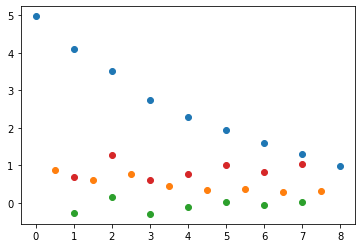

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(np.arange(len(recon)), recon)
plt.scatter(np.arange(len(Diff_recons))+0.5, Diff_recons)
plt.scatter(np.arange(len(genshou_))+1.0, genshou_)
plt.scatter(np.arange(len(genshou))+1.0, genshou)

In [51]:
genshou

[0.6857936128339029,
 1.2646349240115815,
 0.6033870041617577,
 0.7677908946176771,
 1.0152628753018715,
 0.8180759106542612,
 1.0365813616684136]

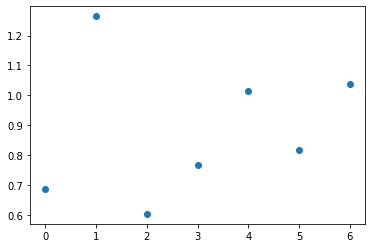

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(np.arange(len(genshou)), genshou)